# Step 4: Model Training - Decision Trees and Random Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load preprocessed data
yelp_df_business_train = pd.read_csv('../data/processed_data/train_data_business.csv')
yelp_df_business_train.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Fast Food,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,BusinessParking,garage,street,validated,lot,valet
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,1,1.0,2.0,"{'garage': False, 'street': False, 'validated'...",0.0,0.0,0.0,1.0,0.0


In [3]:
# Selecting all numerical columns as predictors
X = yelp_df_business_train.select_dtypes(include=['float64', 'int64'])

In [4]:
columns_to_drop = ["stars", "composite_rating", "review_count"]


In [5]:
# Removing the 'stars' column from the predictors
X = X.drop(columns=columns_to_drop)
y = yelp_df_business_train.composite_rating

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117618 entries, 0 to 117617
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   latitude                    117618 non-null  float64
 1   longitude                   117618 non-null  float64
 2   is_open                     117618 non-null  int64  
 3   operational_hours           117618 non-null  float64
 4   Restaurants                 117618 non-null  int64  
 5   Food                        117618 non-null  int64  
 6   Shopping                    117618 non-null  int64  
 7   Beauty & Spas               117618 non-null  int64  
 8   Home Services               117618 non-null  int64  
 9   Nightlife                   117618 non-null  int64  
 10  Bars                        117618 non-null  int64  
 11  Health & Medical            117618 non-null  int64  
 12  Local Services              117618 non-null  int64  
 13  Event Planning

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_regressor.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree R^2: {dt_r2}")

Decision Tree MSE: 26.432349367933146
Decision Tree R^2: -0.0037356722525423436


In [9]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")

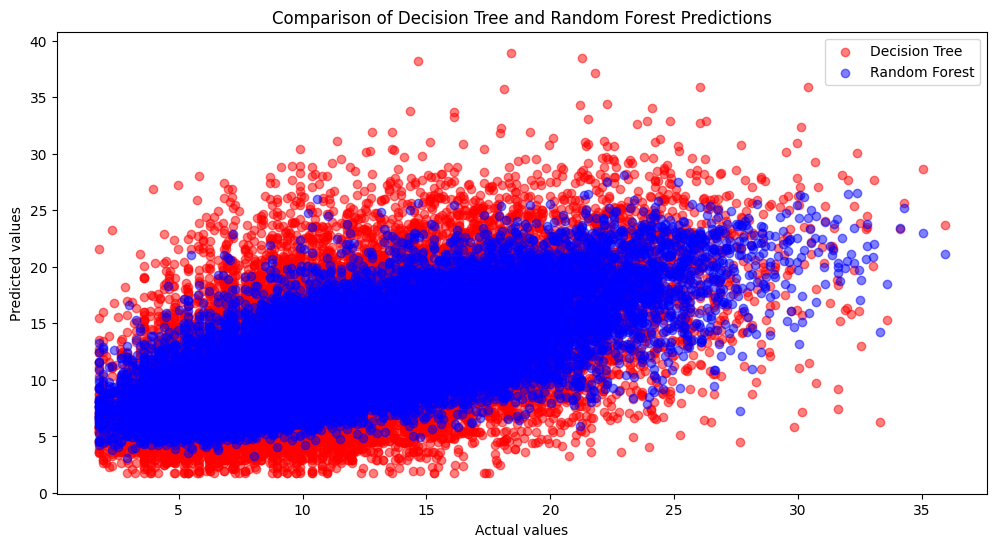

In [ ]:
# Plotting the actual vs predicted values for comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, dt_predictions, color='red', label='Decision Tree', alpha=0.5)
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest', alpha=0.5)
plt.title('Comparison of Decision Tree and Random Forest Predictions')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_regressor is your trained Decision Tree Regressor
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()

NameError: name 'dt_regressor' is not defined

<Figure size 2000x1000 with 0 Axes>